In [2]:
# Load libraries
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd

# Create values Selenium
USERNAME = "behdad.k7@gmail.com" #raw_input("Enter username: ") 
PASSWORD = "1988behrooz10973"#raw_input("Enter password: ") 
linkedin = 'https://www.linkedin.com'

# Open Selenium
browser = webdriver.Firefox()
browser.get(linkedin)
time.sleep(3)
# Identify email and password inputs and enter in information
email = browser.find_element_by_name('session_key')
password = browser.find_element_by_name('session_password')
email.send_keys(USERNAME + Keys.RETURN)
password.send_keys(PASSWORD + Keys.RETURN)
# Go to profile page and scroll to the bottom of the page to load elements of the page
time.sleep(3)

# Large Loop

In [3]:
#Read csv
import csv
#from urllib import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import time

r = pd.read_csv("output_search_Uber.csv")

# Function to identify driver
def driving(x):
    if x.lower().find('data') != -1 or x.lower().find('scien') != -1 or x.lower().find('Data') != -1 or x.lower().find('Scien') != -1 or x.lower().find('machine') != -1:
        return(1)
    else:
        return(0)

    
# Create driver column
r['driver'] = list(map(driving, r['title']))

In [4]:
#Remove value 0

r = r[r.driver != 0]
r

,name,title,location,profile,driver
0,Payam Siyari,Senior Data Scientist at Uber,San Francisco Bay Area,https://www.linkedin.com/in/payamsiyari/,1
1,Afshine Amidi,Data Scientist at Uber,San Francisco Bay Area,https://www.linkedin.com/in/afshineamidi/,1
2,Ehsan Mousavi,Senior Data Scientist II at Uber,San Francisco Bay Area,https://www.linkedin.com/in/ehsan-mousavi-599b...,1
3,Soheil Ehsani,"PhD in computer science, working on self-drivi...",Greater Pittsburgh Area,https://www.linkedin.com/in/soheil-ehsani/,1
4,Akshay Tiwari,Data Scientist at Uber,San Francisco Bay Area,https://www.linkedin.com/in/akshaytiwari19/,1
5,Ye Wang,"Senior Data Analyst, Tech Lead Manager at Uber",San Francisco Bay Area,https://www.linkedin.com/in/wangyepku/,1
7,Taylor Pellerin,Data Scientist at Uber Eats,San Francisco Bay Area,https://www.linkedin.com/in/tjpell/,1
8,Shubham Sharma,Machine Learning and Deep Learning Enthusiast,"Hyderabad Area, India",https://www.linkedin.com/in/shubham-sharma-264...,1
10,RahulRaghavendiran Ravikumar,Data Scientist at Uber AdTech,San Francisco Bay Area,https://www.linkedin.com/in/rahulrr/,1
16,Wei Xu,"Data Scientist at Uber, Ph.D. in Economics",San Francisco Bay Area,https://www.linkedin.com/in/wei-william-xu/,1


In [5]:
#create empty data frame
Exp_df = pd.DataFrame(columns = ['profile', 'exp_title', 'exp_company', 'exp_dates'])
Edu_df = pd.DataFrame(columns = ['profile', 'ed_name', 'ed_deg', 'ed_dates'])
Ski_df = pd.DataFrame(columns = ['profile', 'skill'])

#Create big loop
#for link in r.loc[0:5,'profile']:
for link in r.loc[:,'profile']:
    if link == 'https://www.linkedin.com#':     #if it equal link then skip
        continue 
    time.sleep(2)
# This section is where you put in the profile link (loaded from the csv file) and browse to it
    search = link
    browser.get(search)
    time.sleep(2)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(.75)
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #raw = urlopen(link).read()
    #page = BeautifulSoup(raw, "html.parser")
    page = BeautifulSoup(browser.page_source, 'lxml')
    
#Experience Section  
    titles = page.find_all('div', class_ = "pv-entity__position-group-pager")
    companies = page.find_all('span', class_ = "pv-entity__secondary-title")
    dates = page.find_all('h4', class_ = "pv-entity__date-range")

    #Put scraped data into exp_df

    arraylen1 = len(page.find_all('div', class_ = "pv-entity__position-group-pager"))

    profile = link
    exp_titles = list(map(lambda x: x.h3.text.strip(), titles))[0:arraylen1]
    exp_companies = list(map(lambda x: x.text.strip(), companies))[0:arraylen1]
    exp_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen1]
    
 #Education Section 
    institution = page.find_all('div', class_ = "pv-entity__degree-info")
    degree = page.find_all('p', class_ = "pv-entity__degree-name")
    dates = page.find_all('p', class_ = "pv-entity__dates")
 
    #Put scraped data into edu_df
    
    arraylen2 = len(page.find_all('div', class_ = "pv-entity__degree-info"))

    profile = link
    ed_name = list(map(lambda x: x.text.strip().split('\n')[-1], institution))[0:arraylen2]
    ed_deg = list(map(lambda x: x.text.strip().split('\n')[-1], degree))[0:arraylen2]
    ed_dates = list(map(lambda x: x.text.strip().split('\n')[-1], dates))[0:arraylen2]
    if len(ed_dates) < arraylen2:
        ed_dates = 'NA'
 #Skill Section 
    skill = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
    
    #Put scraped data into a ski_df
    
    arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
    profile = link
    skill = list(map(lambda x: x.text.strip(), skill))[0:arraylen3]
    try:
        temp1 = pd.DataFrame({'profile':profile, 'exp_title':exp_titles, 'exp_company':exp_companies, 'exp_dates':exp_dates})
        temp2 = pd.DataFrame({'profile':profile, 'ed_name':ed_name, 'ed_deg':ed_deg, 'ed_dates':ed_dates}) 
        temp3 = pd.DataFrame({'profile':profile, 'skill':skill})
        Exp_df = Exp_df.append(temp1)
        Edu_df = Edu_df.append(temp2)
        Ski_df = Ski_df.append(temp3)
        print(link, 'completed')
    except:
        print(link, 'skipped')
        continue

https://www.linkedin.com/in/payamsiyari/ completed
https://www.linkedin.com/in/afshineamidi/ skipped
https://www.linkedin.com/in/ehsan-mousavi-599b3b24/ completed
https://www.linkedin.com/in/soheil-ehsani/ completed
https://www.linkedin.com/in/akshaytiwari19/ completed
https://www.linkedin.com/in/wangyepku/ completed
https://www.linkedin.com/in/tjpell/ completed
https://www.linkedin.com/in/shubham-sharma-264840152/ completed
https://www.linkedin.com/in/rahulrr/ completed
https://www.linkedin.com/in/wei-william-xu/ completed
https://www.linkedin.com/in/fei-feng-1b6aba82/ completed
https://www.linkedin.com/in/mashraphijuo/ completed
https://www.linkedin.com/in/fan-yang-978b3a13/ completed
https://www.linkedin.com/in/nicolasfhenry/ completed
https://www.linkedin.com/in/xiao-cai-ph-d-86245415/ completed
https://www.linkedin.com/in/lily-y-liu-a80576125/ completed
https://www.linkedin.com/in/danielchamorro/ completed
https://www.linkedin.com/in/nikhiljuturu/ completed
https://www.linkedin.co

In [6]:
Exp_df

,profile,exp_title,exp_company,exp_dates


In [7]:
Edu_df

,profile,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/payamsiyari/,Computer Science - Minor in Statistics,Doctor of Philosophy (Ph.D.),2014 – 2018
1,https://www.linkedin.com/in/payamsiyari/,4.00/4.00,Master’s Degree,2014 – 2016
2,https://www.linkedin.com/in/payamsiyari/,19.24/20,Master of Science (M.Sc.),2011 – 2013
0,https://www.linkedin.com/in/ehsan-mousavi-599b...,Management Science and Engineering;,PhD,2007 – 2013
1,https://www.linkedin.com/in/ehsan-mousavi-599b...,Financial Mathematics,M.Sc,2007 – 2013
...,...,...,...,...
0,https://www.linkedin.com/in/gauravshimpi007/,Distinction (9.4),Bachelor of Engineering - BE,2016 – 2019
1,https://www.linkedin.com/in/gauravshimpi007/,Distinction (9.8),Diploma,2013 – 2016
0,https://www.linkedin.com/in/padmasini-renga-ba...,Managment,PGP,2010 – 2011
1,https://www.linkedin.com/in/padmasini-renga-ba...,Economics,M.sc,2002 – 2004


In [8]:
Ski_df

,profile,skill
0,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning
1,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations
2,https://www.linkedin.com/in/ehsan-mousavi-599b...,Matlab
0,https://www.linkedin.com/in/akshaytiwari19/,Python
1,https://www.linkedin.com/in/akshaytiwari19/,R
2,https://www.linkedin.com/in/akshaytiwari19/,C++
0,https://www.linkedin.com/in/shubham-sharma-264...,Machine Learning
1,https://www.linkedin.com/in/shubham-sharma-264...,Data Analytics
2,https://www.linkedin.com/in/shubham-sharma-264...,Data Science
0,https://www.linkedin.com/in/fan-yang-978b3a13/,R


In [9]:
# Reset dataframe index
Exp_df.reset_index()
Edu_df.reset_index()
Ski_df.reset_index()
        
# Export results
Exp_df.to_csv("output_experience.csv", index = False,sep='\t', encoding='utf-8')
Edu_df.to_csv("output_education.csv", index = False,sep='\t', encoding='utf-8')
Ski_df.to_csv("output_skills.csv", index = False,sep='\t', encoding='utf-8')

In [10]:
# Close Selenium
browser.quit()

# Data Visualizations 

In [11]:
# Load library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [13]:
experience = pd.read_csv("output_experience.csv", sep = '\t')
education = pd.read_csv("output_education.csv", sep = '\t')
skills = pd.read_csv("output_skills.csv", sep = '\t')

In [14]:
experience

,profile,exp_title,exp_company,exp_dates


In [15]:
education

,profile,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/payamsiyari/,Computer Science - Minor in Statistics,Doctor of Philosophy (Ph.D.),2014 – 2018
1,https://www.linkedin.com/in/payamsiyari/,4.00/4.00,Master’s Degree,2014 – 2016
2,https://www.linkedin.com/in/payamsiyari/,19.24/20,Master of Science (M.Sc.),2011 – 2013
3,https://www.linkedin.com/in/ehsan-mousavi-599b...,Management Science and Engineering;,PhD,2007 – 2013
4,https://www.linkedin.com/in/ehsan-mousavi-599b...,Financial Mathematics,M.Sc,2007 – 2013
...,...,...,...,...
65,https://www.linkedin.com/in/gauravshimpi007/,Distinction (9.4),Bachelor of Engineering - BE,2016 – 2019
66,https://www.linkedin.com/in/gauravshimpi007/,Distinction (9.8),Diploma,2013 – 2016
67,https://www.linkedin.com/in/padmasini-renga-ba...,Managment,PGP,2010 – 2011
68,https://www.linkedin.com/in/padmasini-renga-ba...,Economics,M.sc,2002 – 2004


In [16]:
skills

,profile,skill
0,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning
1,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations
2,https://www.linkedin.com/in/ehsan-mousavi-599b...,Matlab
3,https://www.linkedin.com/in/akshaytiwari19/,Python
4,https://www.linkedin.com/in/akshaytiwari19/,R
5,https://www.linkedin.com/in/akshaytiwari19/,C++
6,https://www.linkedin.com/in/shubham-sharma-264...,Machine Learning
7,https://www.linkedin.com/in/shubham-sharma-264...,Data Analytics
8,https://www.linkedin.com/in/shubham-sharma-264...,Data Science
9,https://www.linkedin.com/in/fan-yang-978b3a13/,R


In [17]:
#Combining skills, experience, education tables for analysis later

from functools import reduce

frames = [skills, experience, education]
Employees = reduce(lambda  left,right: pd.merge(left,right,on=['profile'],
                                            how='outer'), frames)
Employees

,profile,skill,exp_title,exp_company,exp_dates,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Management Science and Engineering;,PhD,2007 – 2013
1,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Financial Mathematics,M.Sc,2007 – 2013
2,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Mathematics,B.S,2001 – 2006
3,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations,NaN,NaN,NaN,Management Science and Engineering;,PhD,2007 – 2013
4,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations,NaN,NaN,NaN,Financial Mathematics,M.Sc,2007 – 2013
...,...,...,...,...,...,...,...,...
117,https://www.linkedin.com/in/nemanja-djuric-1b9...,NaN,NaN,NaN,NaN,4.0 out of 4.0,Doctor of Philosophy (Ph.D.),2009 – 2013
118,https://www.linkedin.com/in/nemanja-djuric-1b9...,NaN,NaN,NaN,NaN,9.54 out of 10.0,Master of Science (M.Sc.),2003 – 2009
119,https://www.linkedin.com/in/padmasini-renga-ba...,NaN,NaN,NaN,NaN,Managment,PGP,2010 – 2011
120,https://www.linkedin.com/in/padmasini-renga-ba...,NaN,NaN,NaN,NaN,Economics,M.sc,2002 – 2004


In [ ]:
#skills.merge(experience, left_on='profile', right_on='profile')


## Education Analysis

In [ ]:
#Creating column to identify degree earned 

edu = education

# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 or x.lower().find('mba') != -1:
        return(1)
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return(2)
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1:
        return(3)
    else:
        return(0)

    
# Create degree column
edu['deg'] = list(map(degree, edu['ed_deg']))

edu

### Last Degree Earned 

In [ ]:
#Gathering only the employee's last completed education before employment 

eduF = edu.groupby('profile').first()
eduF

In [ ]:
#Looking into the percentages of each last degree earned 

eduF['deg'].value_counts(normalize=True) * 100

In [ ]:
pie = eduF['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')
Other = mpatches.Patch(color='red', label='Other')
plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
#Remove degrees Not bachelor 

edum = edu
edum = edum[edum.deg != 0]
edum = edum[edum.deg != 2]
edum = edum[edum.deg != 3]
edum

In [ ]:
# what master degree types are in the value?
edum['ed_name'].unique()

In [ ]:
# Function to identify Master degree name

def degN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('engin') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('finan') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('market') != -1 or x.lower().find('business') != -1:
        return(5)
    if x.lower().find('survey') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edum['deg_name'] = list(map(degN, edum['ed_name']))

#Took out values = 0 because they are only gpa scores 
edum = edum[edum.deg_name != 0]

edum

In [ ]:
edum['deg_name'].value_counts(normalize=True) * 100

In [ ]:
pie7 = edum['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie7.set_title("Master Degree Received", fontsize=18)

Engineer = mpatches.Patch(color='blue', label='Engineer')
Math_Stats_Physics = mpatches.Patch(color='orange', label='Math_Stats_Physics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Business_Marketing = mpatches.Patch(color='red', label='Business_Marketing')
Finance_Economics = mpatches.Patch(color='purple', label='Finance_Economics')
SurveyMethodology = mpatches.Patch(color = 'brown', label='SurveyMethodology')

plt.legend(handles=[Engineer,Math_Stats_Physics,ComputerScience,Business_Marketing,Finance_Economics,SurveyMethodology], loc='center left', bbox_to_anchor=(1, 0.5))

### Type of Bachelor Degree Earned

In [ ]:
#Remove degrees NOT bachelor 

edub = edu
edub = edub[edub.deg != 0]
edub = edub[edub.deg != 1]
edub = edub[edub.deg != 2]
edub

In [ ]:
# Function to identify Bachelor degree name

def degreeN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1:
        return(1)
    if x.lower().find('stat') != -1 or x.lower().find('math') != -1 or x.lower().find('phy') != -1:
        return(2)
    if x.lower().find('eng') != -1 or x.lower().find('elect') != -1 or x.lower().find('ee') != -1:
        return(3)
    if x.lower().find('commun') != -1 or x.lower().find('art') != -1 or x.lower().find('econom') != -1:
        return(4)
    if x.lower().find('auto') != -1:
        return(5)
    if x.lower().find('mari') != -1:
        return(6)
    else:
        return(0)

    
# Create degree column
edub['deg_name'] = list(map(degreeN, edub['ed_name']))

#Took out values = 0 because they are only gpa scores 
edub = edub[edub.deg_name != 0]

edub

In [ ]:
edub['deg_name'].value_counts(normalize=True) * 100

In [ ]:
pie2 = edub['deg_name'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie2.set_title("Bachelor Degree Received", fontsize=18)

Math_Stats_Physics = mpatches.Patch(color='blue', label='Math_Stats_Physics')
Engineer_Electronics = mpatches.Patch(color='orange', label='Engineer_Electronics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
MarineTech = mpatches.Patch(color = 'brown', label='MarineTech')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,MarineTech], loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
bar = edub['deg_name'].value_counts().plot(kind="bar", legend=True)
bar.set_title("Bachelor Degree Received", fontsize=18)
bar.set_xlabel("Bachelor Type", fontsize=18);
bar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Math_Stats_Physics'
labels[1] = 'Engineer_Electronics'
labels[2] = 'ComputerScience'
labels[3] = 'Communications_Arts'
labels[4] = 'Automation'
labels[5] = 'MarineTech'

#bar.set_xticklabels(labels)
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

Math_Stats_Physics = mpatches.Patch(color='blue', label='Math_Stats_Physics')
Engineer_Electronics = mpatches.Patch(color='orange', label='Engineer_Electronics')
ComputerScience  = mpatches.Patch(color='green', label='ComputerScience ')
Communications_Arts = mpatches.Patch(color='red', label='Communications_Arts')
Automation = mpatches.Patch(color='purple', label='Automation')
MarineTech = mpatches.Patch(color = 'brown', label='MarineTech')

plt.legend(handles=[Math_Stats_Physics,Engineer_Electronics,ComputerScience,Communications_Arts,Automation,MarineTech], loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    bar.annotate(format(height), (p.get_x()+.18*width, p.get_y() + height + 0.05))
    

## Skill Analysis


In [ ]:
#Creating column to identify type of skill

#ski = skills

# Function to identify skill
#def skill(x):
 #   if x.lower().find('data') != -1 or x.lower().find('analy') != -1 or x.lower().find('research') != -1 or x.lower().find('hadoop') != -1 or x.lower().find('hive') != -1 or x.lower().find('strategy') != -1 or x.lower().find('algor') != -1:
  #      return(1)
   # if x.lower().find('machine') != -1 or x.lower().find('learning') != -1 or x.lower().find('stat') != -1 or x.lower().find('model') != -1 or x.lower().find('matlab') != -1 or x.lower().find('image') != -1 or x.lower().find('quantit') != -1:
    #    return(2)
    #if x.lower().find('software') != -1 or x.lower().find('product') != -1 or x.lower().find('glob') != -1 or x.lower().find('asset') != -1 or x.lower().find('mob') != -1 or x.lower().find('science') != -1:
     #   return(3)
   # if x.lower().find('python') != -1 or x.lower().find('r') != -1 or x.lower().find('sql') != -1 or x.lower().find('c++') != -1 or x.lower().find('java') != -1 or x.lower().find('linux') != -1 or x.lower().find('c') != -1:
    #    return(4)
   # else:
    #    return(0)

    
# Create skill type column
#ski['ski_type'] = list(map(skill, ski['skill']))
#ski


In [ ]:
#Create column to identify coding language from other skills 

#ski = skills

#Function to identify skill 
#def skill(x):
#    if x.lower().find('python') != -1 or x.lower().find('r') != -1 or x.lower().find('sql') != -1 or x.lower().find('c++') != -1 or x.lower().find('java') != -1 or x.lower().find('linux') != -1 or x.lower().find('c') != -1:
 #       return(1) 
#    else:
#        return(0)

# Create skill type column
#ski['ski_type'] = list(map(skill, ski['skill']))
#ski


###get list and use filter (10)
###use bar graph how many mentions of each y axis # of mentions 

### Best coding language to know

In [18]:
# what skills are in the value?
ski = skills
ski['skill'].unique()

array(['Machine Learning', 'Simulations', 'Matlab', 'Python', 'R', 'C++',
       'Data Analytics', 'Data Science', 'SAS', 'Data Mining',
       'Statistics', 'Java', 'Hadoop', 'Deep Learning',
       'Theoretical Physics', 'Mathematica', 'General Relativity', 'PHP',
       'Software Development Life Cycle (SDLC)', 'C'], dtype=object)

In [27]:
ski2 = ski.loc[ski['skill'].isin(['R','Python', 'SQL', 'C++', 'Java', 'C'])]
ski2
ski2['skill'].value_counts(normalize=True) * 100

Python    40.0
C++       20.0
R         20.0
C         10.0
Java      10.0
Name: skill, dtype: float64

NameError: name 'bar' is not defined

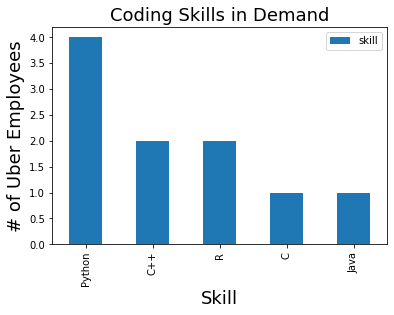

In [20]:
skilbar = ski2['skill'].value_counts().plot(kind="bar", legend=True)
skilbar.set_title("Coding Skills in Demand", fontsize=18)
skilbar.set_xlabel("Skill", fontsize=18);
skilbar.set_ylabel("# of Uber Employees", fontsize=18);
labels = [item.get_text() for item in bar.get_xticklabels()]
labels[0] = 'Python'
labels[1] = 'C++'
labels[2] = 'R'
labels[3] = 'Java'
labels[4] = 'C'
labels[5] = 'SQL'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

Python = mpatches.Patch(color='blue', label='Python')
Cplus = mpatches.Patch(color='orange', label='C++')
R = mpatches.Patch(color='green', label='R')
Java = mpatches.Patch(color='red', label='Java')
C = mpatches.Patch(color='purple', label='C')
SQL = mpatches.Patch(color = 'brown', label='SQL')

plt.legend(handles=[Python,Cplus,R,Java,C,SQL], loc='center left', bbox_to_anchor=(1, 0.5))

for g in axx.patches:
    width, height = g.get_width(), g.get_height()
    x, y = g.get_xy() 
    skilbar.annotate(format(height), (g.get_x()+.18*width, g.get_y() + height + 0.05))

## Experience Analysis

In [21]:
exp = experience

# Function to identify company uber
def uber(x):
    if x.lower().find('uber') != -1:
        return(1)
    else:
        return(0)

    
# Create uber column
exp['uber'] = list(map(uber, exp['exp_company']))

#Remove value 0
#expU = expU[expU.uber != 0]

exp

,profile,exp_title,exp_company,exp_dates,uber


### Companies Employees worked at before Uber 

In [ ]:
#Creating table to show all companies but Uber

exp = experience

#Remove value 1
expC = exp[exp.uber != 1]
expC

In [ ]:
#Gathering only the employee's last employment before starting at Uber

expCL = expC.groupby('profile').first()
expCL

In [ ]:
##Not useful due to numbers

#Looking at top 10 companies employees worked before Uber 

expCL['exp_company'].value_counts(normalize=False).nlargest(10) 

In [ ]:
bar2 = expCL['exp_company'].value_counts().nlargest(10).plot(kind="bar")
bar2.set_title("Last Company Before Uber", fontsize=18)
bar2.set_xlabel("Company", fontsize=18);
bar2.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Years of experience before Uber


In [ ]:
# how many years of experience before Uber

#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates,ed_dates,ed_degree
less = Employees.iloc[:,[0, 6, 5, 2, 3]].drop_duplicates(keep = 'first')

#keep only information for uber
degexp = less.loc[less['exp_company'] == 'Uber']

#drop nan values 
degexpE = degexp.dropna(how='any')
degexpE

In [ ]:
#only select last 4 string in value for the year 
degexpE.loc[:,'ed_dates'] = list(map(lambda x: None if x is None else str(x)[-4:], degexpE['ed_dates']))

#only select string inside whole value with the year
degexpE.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], degexpE['exp_dates']))

#Pull last education year
degexpE = degexpE.groupby('profile').first()
degexpE = degexpE.reset_index()
degexpE

In [ ]:
#drop row with value '-' in column exp_dates 
degexpE = degexpE.drop([14])
degexpE

In [ ]:
#change dtype from object to int.
degexpE['ed_dates'] = degexpE['ed_dates'].astype(str).astype(int)
degexpE['exp_dates'] = degexpE['exp_dates'].astype(str).astype(int)

# Create years_exp column with totals
degexpE['years_exp'] = degexpE['exp_dates'] - degexpE['ed_dates']
degexpE

In [ ]:
yearbar = degexpE['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar")
yearbar.set_title("Years of Experience Before Uber", fontsize=18)
yearbar.set_xlabel("# of Years", fontsize=18);
yearbar.set_ylabel("# of Uber Employees", fontsize=18);

axl = plt.axes()
x_axis2 = axl.axes.get_xaxis()
x_axis2.set_visible(True)

for s in axl.patches:
    width, height = s.get_width(), s.get_height()
    x, y = s.get_xy() 
    yearbar.annotate(format(height), (s.get_x()+.18*width, s.get_y() + height + 0.05))

### Employee's starting year at Uber

In [ ]:
#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates
less2 = Employees.iloc[:,[0, 2, 3]].drop_duplicates(keep = 'first')

#keep only information for uber
expY = less2.loc[less['exp_company'] == 'Uber']
expY

In [ ]:
#only get the year in exp_dates column
expY.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], expY['exp_dates']))
expY

In [ ]:
#drop row with value '-' in column exp_dates 
expY = expY.drop([891])
expY

In [ ]:
#Creating table to show information only for Uber

#Remove value 0
#expU = exp[exp.uber != 0]
#expU

In [ ]:
#Creating column to categorize Uber starting year

# Function to identify starting year at Uber
#def uberY(x):
 #   if x.lower().find('2014') != -1:
  #      return(1)
#    if x.lower().find('2015') != -1:
 #        return(2)
#    if x.lower().find('2016') != -1:
#         return(3)
#    if x.lower().find('2017') != -1:
#         return(4)
#    if x.lower().find('2018') != -1:
#         return(5)
#    if x.lower().find('2019') != -1:
#         return(6)
#    else:
#        return(0)

    
# Create starting year column
#expU['uberY'] = list(map(uberY, expU['exp_dates']))
#expU

In [ ]:
expY.dtypes

expY['exp_dates'] = expY['exp_dates'].astype('category')

In [ ]:
expY['exp_dates'].value_counts(normalize=True) * 100

In [ ]:
expY['exp_dates'].value_counts()

In [ ]:
expYb = expY['exp_dates'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=True)
expYb.set_title("Years When Hired", fontsize=18)
expYb.set_xlabel("Year", fontsize=18);
expYb.set_ylabel("# of Uber Employees", fontsize=18);

labelsY = [item.get_text() for item in bar.get_xticklabels()]
labelsY[0] = '2014'
labelsY[1] = '2015'
labelsY[2] = '2016'
labelsY[3] = '2017'
labelsY[3] = '2018'
labelsY[3] = '2019'


axy = plt.axes()
x_axisy = axy.axes.get_xaxis()
x_axisy.set_visible(False)

fourteen = mpatches.Patch(color='blue', label='2014')
fifteen = mpatches.Patch(color='orange', label='2015')
sixteen = mpatches.Patch(color='green', label='2016')
seventeen = mpatches.Patch(color='red', label='2017')
eighteen = mpatches.Patch(color='purple', label='2018')
nineteen = mpatches.Patch(color='brown', label='2019')

plt.legend(handles=[fourteen,fifteen,sixteen,seventeen,eighteen,nineteen], loc='center left', bbox_to_anchor=(1, 0.5))

for k in axy.patches:
    width, height = k.get_width(), k.get_height()
    x, y = k.get_xy() 
    expYb.annotate(format(height), (k.get_x()+.18*width, k.get_y() + height + 0.05))
    
# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

In [ ]:
expYP = expY['exp_dates'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

expYP.set_title("Uber Hires per Year", fontsize=18)

fourteen = mpatches.Patch(color='blue', label='2014')
fifteen = mpatches.Patch(color='orange', label='2015')
sixteen = mpatches.Patch(color='green', label='2016')
seventeen = mpatches.Patch(color='red', label='2017')
eighteen = mpatches.Patch(color='purple', label='2018')
nineteen = mpatches.Patch(color='brown', label='2019')


plt.legend(handles=[fourteen,fifteen,sixteen,seventeen,eighteen,nineteen], loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
#expY2 = expY.exp_dates.value_counts().reset_index().rename(columns={'index': 'exp_dates', 0: 'count'})
expY2 = expY['exp_dates'].value_counts()\
                 .to_frame('count').rename_axis('exp_dates')\
                 .reset_index()
expY2

In [ ]:
#import numpy as np 


#expY2['exp_dates'].hist() 
#plt.show()

#expY2.plot()

#expY2.plot(x = 'exp_dates', y = 'count', kind = 'line')

#expY2.rename(index=str, columns={"exp_dates": "exp_dates", "count": "count"}).plot()

#expY3= expY2.set_index('exp_dates')
#ax33 = df.plot(xticks=df.index)
#ax44 = expY3.plot(xticks=expY3.index)
#ax44.set_xticklabels(expY3["exp_dates"]);


#expY2.plot(x='exp_dates', y='count', xticks=['exp_dates'])



#expY.hist(column='exp_dates')

#table = expY['exp_dates'].value_counts().plot()
#table.set_title("Year Started at Uber", fontsize=18)
#table.set_xlabel("Year", fontsize=18);
#table.set_ylabel("# of Uber Employees", fontsize=18);

### Job titles at Uber for Data Scienitist field 

In [22]:
#Categorize job positions 

# Function to identify job titles at Uber
def uberJ(x):
    if x.lower().find('soft') != -1:
        return(1)
    if x.lower().find('machine') != -1:
         return(2)
    if x.lower().find('scien') != -1:
         return(3)
    if x.lower().find('analy') != -1:
         return(4)
    if x.lower().find('prod') != -1:
         return(5)
    if x.lower().find('resea') != -1 or x.lower().find('dat') != -1 or x.lower().find('auto') != -1:
         return(6)
    else:
        return(0)

#Remove value 0
expT = exp[exp.uber != 0]  

    
# Create starting year column
expT['uberJ'] = list(map(uberJ, expT['exp_title']))
expT

,profile,exp_title,exp_company,exp_dates,uber,uberJ


In [ ]:
# what titles are in the value?
expT['exp_title'].unique()

In [ ]:
expT['uberJ'].value_counts(normalize=True) * 100

In [ ]:
pie3 = expT['uberJ'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie3.set_title("Job Titles at Uber", fontsize=18)

DataScientists = mpatches.Patch(color='blue', label='DataScientists')
Software = mpatches.Patch(color='orange', label='Software')
Autonomy_DataInsights_DataResearch_DataEngineer  = mpatches.Patch(color='green', label='Autonomy_DataInsights_DataResearch_DataEngineer')
DataAnalyst = mpatches.Patch(color='red', label='Data Analyst')
MachineLearning = mpatches.Patch(color='purple', label='Machine Learning')
Product = mpatches.Patch(color = 'brown', label='Product')

plt.legend(handles=[DataScientists,Software,Autonomy_DataInsights_DataResearch_DataEngineer,DataAnalyst,MachineLearning,Product], loc='center left', bbox_to_anchor=(1, 0.5))


### Categorize Data Scientists titles

In [23]:
#Creating table to show information only for job title Data Scientists in category 
expDS = expT

#Remove values NOT Data Science 
expDS = expDS[expDS.uberJ != 0]
expDS = expDS[expDS.uberJ != 1]
expDS = expDS[expDS.uberJ != 2]
expDS = expDS[expDS.uberJ != 4]
expDS = expDS[expDS.uberJ != 5]
expDS = expDS[expDS.uberJ != 6]

#Drop columns not needed for analysis - uber
expDS = expDS.drop(['uber', 'uberJ'], axis = 1)
expDS

,profile,exp_title,exp_company,exp_dates


In [ ]:
# what data science titles are in the value?
expDS['exp_title'].unique()

In [ ]:
expDS['exp_title'].value_counts(normalize=True) * 100

In [ ]:
pie4 = expDS['exp_title'].value_counts().plot(kind="pie", autopct='%1.1f%%')

pie4.set_title("Data Science Job Titles at Uber", fontsize=18)

In [ ]:
DSbar = expDS['exp_title'].value_counts().plot(kind="bar", legend = True)

## Data Scientist vs. Senior Data Scientist 

In [24]:
Employees

,profile,skill,exp_title,exp_company,exp_dates,ed_name,ed_deg,ed_dates
0,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Management Science and Engineering;,PhD,2007 – 2013
1,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Financial Mathematics,M.Sc,2007 – 2013
2,https://www.linkedin.com/in/ehsan-mousavi-599b...,Machine Learning,NaN,NaN,NaN,Mathematics,B.S,2001 – 2006
3,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations,NaN,NaN,NaN,Management Science and Engineering;,PhD,2007 – 2013
4,https://www.linkedin.com/in/ehsan-mousavi-599b...,Simulations,NaN,NaN,NaN,Financial Mathematics,M.Sc,2007 – 2013
...,...,...,...,...,...,...,...,...
117,https://www.linkedin.com/in/nemanja-djuric-1b9...,NaN,NaN,NaN,NaN,4.0 out of 4.0,Doctor of Philosophy (Ph.D.),2009 – 2013
118,https://www.linkedin.com/in/nemanja-djuric-1b9...,NaN,NaN,NaN,NaN,9.54 out of 10.0,Master of Science (M.Sc.),2003 – 2009
119,https://www.linkedin.com/in/padmasini-renga-ba...,NaN,NaN,NaN,NaN,Managment,PGP,2010 – 2011
120,https://www.linkedin.com/in/padmasini-renga-ba...,NaN,NaN,NaN,NaN,Economics,M.sc,2002 – 2004


### Degree Difference - Senior 

In [ ]:
# separting into two categories - highest degree

#drop duplicates in dataframe and only keep: profile,exp_company,ed_degree,exp_title
less5 = Employees.iloc[:,[0,2,4,6]].drop_duplicates(keep = 'first')

#keep only information for uber
DShighdeg = less5.loc[less['exp_company'] == 'Uber']

In [ ]:
#Pull last education year
DShighdeg = DShighdeg.groupby('profile').first()
DShighdeg = DShighdeg.reset_index()
DShighdeg

In [ ]:
# what data science titles are in the value?
DShighdeg['exp_title'].unique()

In [ ]:
# Function to categorize data science
def DS(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
DShighdeg['DS'] = list(map(DS, DShighdeg['exp_title']))
DShighdeg

In [ ]:
#Remove value 0
DShighdeg = DShighdeg[DShighdeg.DS != 0]  

In [ ]:
DShighdeg['DS'].value_counts(normalize=False)

In [ ]:
#create separate tables to compare highest level between each 

#Remove value 0
DShighdeg1 = DShighdeg[DShighdeg.DS != 2]
DShighdeg1

In [ ]:
# Function to categorize data science education 
def DS_deg(x):
    if x.lower().find('phd') != -1 or x.lower().find('ph.d') != -1:
         return(1)
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1:
         return(2)
    if x.lower().find('bachelor') != -1:
         return(3)    
    else:
        return(0)
   

#create column for category education 
DShighdeg1['DS_deg'] = list(map(DS_deg, DShighdeg1['ed_deg']))
DShighdeg1

In [ ]:
DShighdeg1['DS_deg'].value_counts(normalize=False)

In [ ]:
DSbar = DShighdeg1['DS_deg'].value_counts().plot(kind="bar", legend=True)
DSbar.set_title("Senior Data Science Education", fontsize=18)
DSbar.set_xlabel("Education", fontsize=18);
DSbar.set_ylabel("# of Uber Employees", fontsize=18);
labels5 = [item.get_text() for item in bar.get_xticklabels()]
labels5[0] = 'Master'
labels5[1] = 'Ph.D'
labels5[2] = 'Bachelor'
labels5[3] = 'Other'


ax5 = plt.axes()
x_axis5 = ax5.axes.get_xaxis()
x_axis5.set_visible(False)

Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')
Other = mpatches.Patch(color='red', label='Other')

plt.legend(handles=[Master,PhD,Bachelor,Other], loc='center left', bbox_to_anchor=(1, 0.5))

for c in ax5.patches:
    width, height = c.get_width(), c.get_height()
    x, y = c.get_xy() 
    DSbar.annotate(format(height), (c.get_x()+.18*width, c.get_y() + height + 0.05))
    
# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Degree difference - Entry

In [ ]:
#create separate tables to compare highest level between each 

#Remove value 1
DShighdeg2 = DShighdeg[DShighdeg.DS != 1]
DShighdeg2

In [ ]:
# Function to categorize data science education 
def DSE_deg(x):
    if x.lower().find('phd') != -1 or x.lower().find('ph.d') != -1:
         return(1)
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1:
         return(2)
    if x.lower().find('bachelor') != -1:
         return(3)    
    else:
        return(0)
   

#create column for category education 
DShighdeg2['DSE_deg'] = list(map(DSE_deg, DShighdeg2['ed_deg']))
DShighdeg2

In [ ]:
DShighdeg2['DSE_deg'].value_counts(normalize=False)

In [ ]:
DSEbar = DShighdeg2['DSE_deg'].value_counts().plot(kind="bar", legend=True)
DSEbar.set_title("Data Science Education", fontsize=18)
DSEbar.set_xlabel("Education", fontsize=18);
DSEbar.set_ylabel("# of Uber Employees", fontsize=18);
labels6 = [item.get_text() for item in bar.get_xticklabels()]
labels5[0] = 'Master'
labels5[1] = 'Ph.D'
labels5[2] = 'Bachelor'

ax6 = plt.axes()
x_axis6 = ax6.axes.get_xaxis()
x_axis6.set_visible(False)

Master = mpatches.Patch(color='blue', label='Master')
PhD = mpatches.Patch(color='orange', label='Ph.D')
Bachelor = mpatches.Patch(color='green', label='Bachelor')

plt.legend(handles=[Master,PhD,Bachelor], loc='center left', bbox_to_anchor=(1, 0.5))

for e in ax6.patches:
    width, height = e.get_width(), e.get_height()
    x, y = e.get_xy() 
    DSEbar.annotate(format(height), (e.get_x()+.18*width, e.get_y() + height + 0.05))

### Experience difference - senior

In [ ]:
# how many years of experience before Uber analysis for DS

#drop duplicates in dataframe and only keep: profile,exp_company,exp_dates,ed_dates,ed_degree,exp_title
less6 = Employees.iloc[:,[0, 2, 3, 4, 5, 6]].drop_duplicates(keep = 'first')

#keep only information for uber
DSexp = less6.loc[less['exp_company'] == 'Uber']

#drop nan values 
DSexp = DSexp.dropna(how='any')
DSexp

In [ ]:
#only select last 4 string in value for the year 
DSexp.loc[:,'ed_dates'] = list(map(lambda x: None if x is None else str(x)[-4:], DSexp['ed_dates']))

#only select string inside whole value with the year
DSexp.loc[:,'exp_dates'] = list(map(lambda x: None if x is None else str(x)[4:9], DSexp['exp_dates']))

#Pull last education year
DSexp = DSexp.groupby('profile').first()
DSexp = DSexp.reset_index()
DSexp

In [ ]:
#drop row with value '-' in column exp_dates 
DSexp = DSexp.drop([14])

#change dtype from object to int.
DSexp['ed_dates'] = degexpE['ed_dates'].astype(str).astype(int)
DSexp['exp_dates'] = degexpE['exp_dates'].astype(str).astype(int)

# Create years_exp column with totals
DSexp['years_exp'] = DSexp['exp_dates'] - DSexp['ed_dates']
DSexp

In [ ]:
# Function to categorize data science
def DS_exp(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
DSexp['DS_exp'] = list(map(DS_exp, DSexp['exp_title']))
DSexp

In [ ]:
#Remove value 0
DSexp = DSexp[DSexp.DS_exp != 0] 

In [ ]:
DSexp['DS_exp'].value_counts(normalize=False)  ##numbers are different due to droping nan values with no date years


In [ ]:
#create separate tables to compare experience level between each 

#Remove value 2
DSexp1 = DSexp[DSexp.DS_exp != 2]
DSexp1

In [ ]:
DSexpbar = DSexp1['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=False)
DSexpbar.set_title("Senior Data Science Experience", fontsize=18)
DSexpbar.set_xlabel("Experience Years", fontsize=18);
DSexpbar.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

In [ ]:
#create separate tables to compare experience level between each 

#Remove value 2
DSexp2 = DSexp[DSexp.DS_exp != 1]
DSexp2

In [ ]:
DSexpbar2 = DSexp2['years_exp'].value_counts().sort_index(ascending=True).plot(kind="bar", legend=False)
DSexpbar2.set_title("Data Science Experience", fontsize=18)
DSexpbar2.set_xlabel("Experience Years", fontsize=18);
DSexpbar2.set_ylabel("# of Uber Employees", fontsize=18);

# make the y ticks integers, not floats
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

### Skills Difference - Senior

In [ ]:
Employees

In [ ]:
# mentions of skills for data science comparison 

#drop duplicates in dataframe and only keep: profile,exp_title,skill,exp_company
less11 = Employees.iloc[:,[0, 1, 2, 4]].drop_duplicates(keep = 'first')

#keep only information for uber
skil_ds = less11.loc[less11['exp_company'] == 'Uber', ]

#drop nan values 
#DSexp = DSexp.dropna(how='any')
#DSexp

#Gathering only the employee's last job title which is at Uber
#skil_ds = less11.groupby('profile').first()

In [ ]:
skil_ds

In [ ]:
# Function to categorize data science
def DSs(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return(1)
    if x.lower().find('scientist') != -1:
         return(2)
    else:
        return(0)
   

#create column for category 
skil_ds['DS'] = list(map(DSs, skil_ds['exp_title']))
skil_ds

In [ ]:
#Remove value 0
skil_ds = skil_ds[skil_ds.DS != 0] 

In [ ]:
#create separate tables to compare skills between each 

#Remove value 2
skil_ds1 = skil_ds[skil_ds.DS != 2]
skil_ds1

In [ ]:
skil_ds1['skill'].value_counts(normalize=False) 

In [ ]:
#drop duplicates in dataframe and only keep: profile,skill
#DSskill1 = DSskill1.iloc[:,[0, 1]].drop_duplicates(keep = 'first')
#DSskill1

In [ ]:
skil_dsbar = skil_ds1['skill'].value_counts().nlargest(5).plot(kind="bar", legend=False)
skil_dsbar.set_title("Senior Data Science Skills", fontsize=18)
skil_dsbar.set_xlabel("Skills", fontsize=18);
skil_dsbar.set_ylabel("# of Uber Employees", fontsize=18);

labels11 = [item.get_text() for item in bar.get_xticklabels()]
labels11[0] = 'Machine Learning'
labels11[1] = 'Python'
labels11[2] = 'Algorithms'
labels11[3] = 'Data Analysis'
labels11[4] = 'Optimization Models'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

MachineLearning = mpatches.Patch(color='blue', label='Machine Learning')
Python = mpatches.Patch(color='orange', label='Python')
Algorithms = mpatches.Patch(color='green', label='Algorithms')
DataAnalysis = mpatches.Patch(color='red', label='Data Analysis')
OptimizationModels = mpatches.Patch(color='purple', label='Optimization Models')

plt.legend(handles=[MachineLearning,Python,Algorithms,DataAnalysis,OptimizationModels], loc='center left', bbox_to_anchor=(1, 0.5))

for z in axx.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    skil_dsbar.annotate(format(height), (z.get_x()+.18*width, z.get_y() + height + 0.05))
    

### Skills Difference - Entry

In [ ]:
#create separate tables to compare skills between each 

#Remove value 1
skil_ds2 = skil_ds[skil_ds.DS != 1]
skil_ds2

In [ ]:
skil_ds2['skill'].value_counts(normalize=False) 

In [ ]:
skil_dsbar2 = skil_ds2['skill'].value_counts().nlargest(5).plot(kind="bar", legend=False)
skil_dsbar2.set_title("Data Science Skills", fontsize=18)
skil_dsbar2.set_xlabel("Skills", fontsize=18);
skil_dsbar2.set_ylabel("# of Uber Employees", fontsize=18);

labelsc = [item.get_text() for item in bar.get_xticklabels()]
labelsc[0] = 'Python'
labelsc[1] = 'Machine Learning'
labelsc[2] = 'R'
labelsc[3] = 'Data Analysis'
labelsc[4] = 'Matlab'

axx = plt.axes()
x_axis2 = axx.axes.get_xaxis()
x_axis2.set_visible(False)

Python = mpatches.Patch(color='blue', label='Python')
MachineLearning = mpatches.Patch(color='orange', label='Machine Learning')
R = mpatches.Patch(color='green', label='R')
DataAnalysis = mpatches.Patch(color='red', label='Data Analysis')
Matlab = mpatches.Patch(color='purple', label='Matlab')

plt.legend(handles=[Python,MachineLearning,R,DataAnalysis,Matlab], loc='center left', bbox_to_anchor=(1, 0.5))

for z in axx.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    skil_dsbar2.annotate(format(height), (z.get_x()+.18*width, z.get_y() + height + 0.05))
    